# <center>  La roue des émotions </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk # un module spécialisé au traitement du texte

#from jyquickhelper import add_notebook_menu
#add_notebook_menu()
from jyquickhelper import add_notebook_menu

add_notebook_menu()

# I) Problématique 

Pour entretenir des rapports sociaux stables, sereins, de confiance et efficaces, au travers des outils de communication écrites, lorsqu'il n'est pas possible d'avoir la visio (avec caméra), il est nécessaire de détecter des éléments "clés" dans les channels de discussions / mails qui nous permettront de déceler de la colère, de la frustration, de la tristesse ou encore de la joie de la part d'un collègue ou d'un amis pour adapter nos relations sociales.

# II) Objectif 

Développer un modèle de machine learning permettant de classer les phrases suivant l'émotion principale qui en ressort.



# III) Exploration des données

Nous travaillons dans un premier temps avec le jeu de données issue de Kaggle pour réaliser vos apprentissage et l'évaluation de vos modèles:

https://www.kaggle.com/ishantjuyal/emotions-in-text

Dans l'objectif d'enrichir notre prédictions nous souhaitons augmenter notre jeux de donneés. Nous travaillons dans un deuxième temps avec le jeux de données issue de data.world:

https://data.world/crowdflower/sentiment-analysis-in-text

##  III-1) Chargement des données

On commence par charger notre première base de données et explorer nos les jeux de données

In [2]:
data_em_01= pd.read_csv("Data-Emotion-01.csv") # importation des données sous forme d'un tableau pandas
data_em_01 # visualization du tableau

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
21454,Melissa stared at her friend in dism,fear
21455,Successive state elections have seen the gover...,fear
21456,Vincent was irritated but not dismay,fear
21457,Kendall-Hume turned back to face the dismayed ...,fear


In [3]:
print(len(data_em_01))
print(data_em_01.info())
data_em_01.head(10)

21459
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB
None


,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,happy
9,i feel romantic too,love


AxesSubplot(0.125,0.125;0.775x0.755)


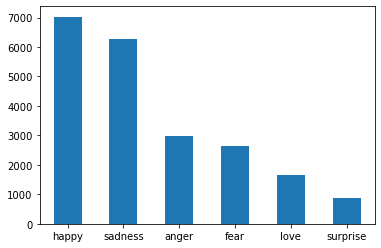

In [4]:
counts01=data_em_01['Emotion'].value_counts()
axis = counts01.plot.bar(rot=0)
print(axis)
plt.show()



In [5]:
data_em_01['Emotion'].value_counts().sum()

21459

In [6]:
len(data_em_01['Emotion'].unique())

6

In [7]:
data_em_01.describe()

,Text,Emotion
count,21459,21459
unique,21405,6
top,i am feeling stressed and more than a bit anxious,happy
freq,2,7029


In [8]:
#data_em_01.groupby(by="Emotion")

duplicateRowsDF = data_em_01[data_em_01.duplicated(keep=False)]
print("Duplicate Rows based on all columns are :")
print(duplicateRowsDF)


Duplicate Rows based on all columns are :
                                                    Text Emotion
4975   i feel more adventurous willing to take risks ...   happy
13846  i feel more adventurous willing to take risks ...   happy
21150         There was a hint of exasperation in his vo   anger
21165         There was a hint of exasperation in his vo   anger
21241  His comments are a major diplomatic gaffe as t...    fear
21250  His comments are a major diplomatic gaffe as t...    fear


In [9]:
data_em_02 = data_em_01.drop_duplicates()

In [10]:
data_em_01.describe()

,Text,Emotion
count,21459,21459
unique,21405,6
top,i am feeling stressed and more than a bit anxious,happy
freq,2,7029


In [11]:
data_em_02.describe()

,Text,Emotion
count,21456,21456
unique,21405,6
top,i feel like a tortured artist when i talk to her,happy
freq,2,7028


In [12]:
counts02=data_em_02['Emotion'].value_counts()
counts02

happy       7028
sadness     6265
anger       2992
fear        2651
love        1641
surprise     879
Name: Emotion, dtype: int64

In [13]:
#columns=X1.columns.values #Store the name of the columns for labeling
counts03=pd.DataFrame(counts02,columns = ['Emotion'])
columns03=counts03.columns.values #Store the name of the columns for labeling
index03=counts03.index.values

print(counts03)
print(columns03)
print(index03)

          Emotion
happy        7028
sadness      6265
anger        2992
fear         2651
love         1641
surprise      879
['Emotion']
['happy' 'sadness' 'anger' 'fear' 'love' 'surprise']


<AxesSubplot:ylabel='Emotion'>

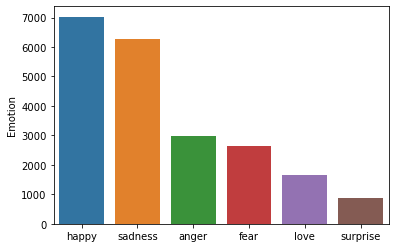

In [14]:
import seaborn as sns
sns.barplot(x=counts03.index.values, y= 'Emotion', data=counts03)

# IV) Prétraitement des données

In [15]:
import copy
data_em_02_c01=copy.copy(data_em_02)
data_em_02_c01.info()
# Notre binarisation à travers des fonctions pandas
data_em_02_c01['category'] = data_em_02_c01['Emotion'].astype('category').cat.codes
data_em_02_c01.info()
data_em_02_c01.head(15)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 21456 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21456 non-null  object
 1   Emotion  21456 non-null  object
dtypes: object(2)
memory usage: 502.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21456 entries, 0 to 21458
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      21456 non-null  object
 1   Emotion   21456 non-null  object
 2   category  21456 non-null  int8  
dtypes: int8(1), object(2)
memory usage: 523.8+ KB


,Text,Emotion,category
0,i didnt feel humiliated,sadness,4
1,i can go from feeling so hopeless to so damned...,sadness,4
2,im grabbing a minute to post i feel greedy wrong,anger,0
3,i am ever feeling nostalgic about the fireplac...,love,3
4,i am feeling grouchy,anger,0
5,ive been feeling a little burdened lately wasn...,sadness,4
6,ive been taking or milligrams or times recomme...,surprise,5
7,i feel as confused about life as a teenager or...,fear,1
8,i have been with petronas for years i feel tha...,happy,2
9,i feel romantic too,love,3


In [16]:
data_em_02_c01.tail(15)

,Text,Emotion,category
21444,"Effortlessly , his knee slid to part her legs ...",fear,1
21445,The commercial ethic meant some deterioration ...,fear,1
21446,This caused a good deal of consternation and d...,fear,1
21447,And it was equally insistent that a policy of ...,fear,1
21448,Floyd Patterson has expressed dismay over the ...,fear,1
21449,"Edouard looked at him , and felt a sickening dism",fear,1
21450,When Tina and the children moved into the Scho...,fear,1
21451,But he felt ` dismay and sorrow for so many pe...,fear,1
21452,"They stared at one another in dismay , the sad...",fear,1
21453,Cleo stared at the contents with dism,fear,1


Le traitement du langage naturel (TALN en français et NLPen anglais) est une branche de l'intelligence artificielle qui traite de l'interaction entre les ordinateurs et les humains en utilisant le langage naturel.

Les données générées à partir de conversations, de déclarations ou même de tweets sont des exemples de données non structurées. Les données non structurées ne s'intègrent pas parfaitement dans la structure traditionnelle de lignes et de colonnes des bases de données relationnelles et représentent la grande majorité des données disponibles dans le monde réel. C'est compliqué et difficile à manipuler. 

Une approche consiste à découper les documents en mots et compter le nombre des fois que chaque mot apparait dans le texte (ensemble des documents). Ce comptage sera aprés stockée dans une matrice appelé "Bag of words".  

In [17]:
import re
#    pattern = re.compile(r"(.)\1{2,}", re.DOTALL)
#    texts = pattern.sub(r"\1",'daaaaata')
#    print(texts)

# 
texts="I Goooot à very Good ba va aa ababa ll lo ol  Food, http @Amiiiiraaaa ::  524 41th 23-rdt-220  ....` & & !!!,\ im:  can't, didnt, ive n't "
def lowercasing(texts):
    """ permet de convertir ma chaine en minuscules"""
    texts = texts.lower()
    return texts
texts=lowercasing(texts)
print(texts)
def transformnegationform(texts):
    """Transform short negation form"""
    texts = re.sub(r"(can't|cannot)", 'can not',texts)
    texts = re.sub(r"n't", 'not',texts)
    texts = re.sub(r"didnt",'did not',texts)
    texts = re.sub(r"im",'i am',texts)
    texts = re.sub(r"ive",' i have',texts)
    return texts
texts = transformnegationform(texts)
print(texts)

i goooot à very good ba va aa ababa ll lo ol  food, http @amiiiiraaaa ::  524 41th 23-rdt-220  ....` & & !!!,\ im:  can't, didnt, ive n't 
i goooot à very good ba va aa ababa ll lo ol  food, http @amiiiiraaaa ::  524 41th 23-rdt-220  ....` & & !!!,\ i am:  can not, did not,  i have not 


In [18]:
import string 
import unicodedata
def normalize(texts):
    """ Enlever les mots avec accents"""
    texts = unicodedata.normalize('NFKD', texts).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return texts
texts=normalize(texts)
print(texts)

i goooot a very good ba va aa ababa ll lo ol  food, http @amiiiiraaaa ::  524 41th 23-rdt-220  ....` & & !!!,\ i am:  can not, did not,  i have not 


In [19]:
def removespecialcaracter(texts): 
    texts = re.sub(r'\W', ' ', texts)
    texts = re.sub(r"(http|@)\S+", "",texts)
    #texts = texts.apply(demojize)
    #texts = re.sub(r"::", ": :",texts)
    #texts = re.sub(r"’", "'",texts)
    #texts = re.sub(r"[^a-z\':_]", " ",texts)
# remove all single characters
    texts= re.sub(r'\s+[a-zA-Z]\s+', ' ', texts)
# Remove single characters from the start
    texts = re.sub(r'\^[a-zA-Z]\s+', ' ', texts) 
# Substituting multiple spaces with single space
    texts = re.sub(r'\s+', ' ', texts, flags=re.I)
# Removing prefixed 'b'
    texts = re.sub(r'^b\s+', '', texts)
    return texts
texts=removespecialcaracter(texts)
print(texts)

i goooot very good ba va aa ababa ll lo ol food http amiiiiraaaa 524 41th 23 rdt 220 am can not did not have not 


In [20]:
## Remove repetitions
    #pattern = re.compile(r"(.)\1{2,}", re.DOTALL)
    #texts = texts.replace(pattern, r"\1")
def removerepetiotion(texts):
    """ enleve la répétitions du caractère dans un mot """
    pattern = re.compile(r"(.)\1{2,}", re.DOTALL)
    texts = pattern.sub(r"\1",texts)
    return texts


In [21]:
print(removerepetiotion('aa'))

aa


In [22]:
texts=removerepetiotion(texts)
print(texts)


i got very good ba va aa ababa ll lo ol food http amira 524 41th 23 rdt 220 am can not did not have not 


In [23]:
gist_file01 = open("gist_stopwords01.txt", "r")
try:
    content = gist_file01.read()
    stopwords01 = content.split(",")
finally:
    gist_file01.close()

gist_file02 = open("gist_stopwords02.txt", "r")
try:
    content = gist_file02.read()
    stopwords02 = content.split(",")
finally:
    gist_file02.close() 
    
stopwords = nltk.corpus.stopwords.words('english')

ens =set(stopwords)
ens1=set(stopwords01)
ens2=set(stopwords02)
ensf=ens|ens1|ens2
stopwordsf=list(ensf)

print(len(stopwords), len(stopwords01),len(stopwords02),len(stopwordsf))
def splittext(texts):
    """ découper le texte selon un seul espace"""
    #texts = re.split(' ', texts)
    texts = [word for word in texts.split() if word not in stopwordsf]
    return texts
texts=splittext(texts)
print(texts)

179 1160 329 1194
['good', 'aa', 'ababa', 'food', 'amira', '524', '41th', '23', 'rdt', '220']


In [24]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
lemma_function = WordNetLemmatizer()

def lemmetize(texts):
    texts = [lemma_function.lemmatize(token, tag_map[tag[0]]) for token, tag in pos_tag(texts)]
    return texts
texts=lemmetize(texts)
print(texts)

#def lemmetize1(texts)
    #for token, tag in pos_tag(texts):
        #if tag.startswith("NN"):
          # pos = 'n'
       # elif tag.startswith('VB'):
          # pos = 'v'
        #else:
          # pos = 'a'

       # token = lemma_function.lemmatize(token, pos)
        

['good', 'aa', 'ababa', 'food', 'amira', '524', '41th', '23', 'rdt', '220']


In [25]:
def numericremove(texts):
    texts = [word for word in texts if word.isalpha()]
    return texts
texts=numericremove(texts)
print(texts)

['good', 'aa', 'ababa', 'food', 'amira', 'rdt']


In [26]:
def removeshortword2(texts):
    texts = [word for word in texts if len(word)>3]
    return texts
texts=removeshortword2(texts)
print(texts)

['good', 'ababa', 'food', 'amira']


In [27]:
from nltk.util import ngrams
#def build_ngrams(text, n=2):
    #tokens = text.lower().split()
    #return list(nltk.ngrams(tokens, n))

#corpus = [build_ngrams(document) for document in corpus]

def buildngrams(texts, n=2):
    #text= ','.join([ch for ch in texts])
    texts=ngrams(texts, n)
    return list(texts)
texts2=buildngrams(texts)
print(texts2)

[('good', 'ababa'), ('ababa', 'food'), ('food', 'amira')]


In [28]:
from nltk.util import everygrams
def buildngramscontinu(texts,n):
    texts=everygrams(texts, max_len=n)
    return list(texts)
texts=buildngramscontinu(texts,2)
print(texts)

[('good',), ('ababa',), ('food',), ('amira',), ('good', 'ababa'), ('ababa', 'food'), ('food', 'amira')]


In [29]:
def clean_title(texts):
    texts=lowercasing(texts)
    texts=transformnegationform(texts)
    texts=normalize(texts)
    texts=removespecialcaracter(texts)
    texts=removerepetiotion(texts)
    texts=splittext(texts)
    texts=lemmetize(texts)
    texts=numericremove(texts)
    texts=removeshortword2(texts)
    texts=buildngramscontinu(texts,2)
    return texts

In [30]:
texts="I Goooot à very Good  Food, http @Amiiiiraaaa ::  524 41th 23-rdt-220  ....` & & !!!,\ im:  can't, didnt, ive n't "
texts=clean_title(texts)
print(texts)

[('good',), ('food',), ('amira',), ('good', 'food'), ('food', 'amira')]


In [31]:
texts='abandon abandoned abandoning abandonment'
texts=clean_title(texts)
print(texts)

[('abandon',), ('abandon',), ('abandoning',), ('abandonment',), ('abandon', 'abandon'), ('abandon', 'abandoning'), ('abandoning', 'abandonment')]


In [32]:
print(clean_title(data_em_02_c01["Text"][1]))
print(data_em_02_c01["Text"][1])

[('feel',), ('hopeless',), ('damn',), ('hopeful',), ('care',), ('awake',), ('feel', 'hopeless'), ('hopeless', 'damn'), ('damn', 'hopeful'), ('hopeful', 'care'), ('care', 'awake')]
i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake


In [33]:
counts12=data_em_02_c01['category'].value_counts()
counts12

2    7028
4    6265
0    2992
1    2651
3    1641
5     879
Name: category, dtype: int64

In [34]:
counts12=data_em_02_c01['category'].value_counts()
counts12

2    7028
4    6265
0    2992
1    2651
3    1641
5     879
Name: category, dtype: int64

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
#count_vectorize2 = CountVectorizer(analyzer=clean_title,ngram_range=(2, 2))
count_vectorize2 = CountVectorizer(analyzer=clean_title)
#count_vectorize2 = CountVectorizer(analyzer=clean_title)
bag_of_words2= count_vectorize2.fit_transform(data_em_02_c01["Text"])
print(bag_of_words2.shape)

(21456, 94048)


In [36]:
feature_names2 = count_vectorize2.get_feature_names()
print(feature_names2)

[('aaron',), ('aaron', 'copland'), ('aaron', 'friend'), ('abandon',), ('abandon', 'abandon'), ('abandon', 'bishop'), ('abandon', 'dream'), ('abandon', 'empathise'), ('abandon', 'feel'), ('abandon', 'fool'), ('abandon', 'millionth'), ('abandon', 'online'), ('abandon', 'peace'), ('abandon', 'plate'), ('abandon', 'policy'), ('abandon', 'project'), ('abandon', 'race'), ('abandon', 'reality'), ('abandon', 'sake'), ('abandon', 'speaks'), ('abandon', 'support'), ('abandon', 'wonderful'), ('abandonment',), ('abandonment', 'begin'), ('abandonment', 'embrace'), ('abandonment', 'hope'), ('abandonment', 'love'), ('abate',), ('abate', 'lose'), ('abba',), ('abba', 'point'), ('abbigail',), ('abbigail', 'apraxia'), ('abdomen',), ('abdomen', 'ache'), ('abdomen', 'pelvis'), ('abdomen', 'regular'), ('abdominal',), ('abdominal', 'surgery'), ('abduct',), ('abduct', 'daughter'), ('abelard',), ('abhorrent',), ('abide',), ('abide', 'deem'), ('abide', 'political'), ('abigail',), ('abigail', 'vexed'), ('ability

In [37]:
from sklearn.preprocessing import Normalizer
#transformer = Normalizer()
#bag_of_words2=transformer.fit_transform(bag_of_words2)

In [38]:
#print(bag_of_words2 != bag_of_words3)

In [39]:
from sklearn.pipeline import Pipeline

In [40]:
## V-1) Split de nos données pour l'entrainement
# split 
from sklearn.model_selection import train_test_split
from collections import Counter

X=copy.copy(bag_of_words2)
Y=copy.copy(data_em_02_c01['category'])


print(X.shape)
print(Y.shape)
print(Counter(Y))


(21456, 94048)
(21456,)
Counter({2: 7028, 4: 6265, 0: 2992, 1: 2651, 3: 1641, 5: 879})


In [41]:
# split into train test sets with stratify
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42, stratify=Y)
print(Counter(Y))
print(Counter(Y_train))
print(Counter(Y_test))

Counter({2: 7028, 4: 6265, 0: 2992, 1: 2651, 3: 1641, 5: 879})
Counter({2: 5622, 4: 5012, 0: 2393, 1: 2121, 3: 1313, 5: 703})
Counter({2: 1406, 4: 1253, 0: 599, 1: 530, 3: 328, 5: 176})


In [42]:
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression(max_iter=1000, multi_class='multinomial')# the maximum of ietration to train is very important 
clr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [43]:
clr1=clr.score(X_test, Y_test)
clr2=clr.score(X_train, Y_train)
clr3=clr.score(X, Y)
print(clr1,clr2,clr3)

0.8571761416589003 0.9865998601724539 0.9607102908277405


In [44]:
## rapport de la régression
# plot an show of the 
from sklearn.metrics import confusion_matrix, classification_report
conf= confusion_matrix(Y_test, clr.predict(X_test))
conf

array([[ 486,    8,   44,    4,   56,    1],
       [  19,  439,   20,    3,   27,   22],
       [   8,   11, 1279,   50,   53,    5],
       [   7,    3,   79,  227,   12,    0],
       [  18,   19,   77,    6, 1132,    1],
       [   7,   22,   19,    1,   11,  116]])

In [45]:

report = classification_report(Y_test, clr.predict(X_test))
print('Le rapport de classification des émotions:', report, sep='\n')

Le rapport de classification des émotions:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       599
           1       0.87      0.83      0.85       530
           2       0.84      0.91      0.87      1406
           3       0.78      0.69      0.73       328
           4       0.88      0.90      0.89      1253
           5       0.80      0.66      0.72       176

    accuracy                           0.86      4292
   macro avg       0.84      0.80      0.82      4292
weighted avg       0.86      0.86      0.86      4292



In [46]:
len(data_em_02_c01['category'])

21456

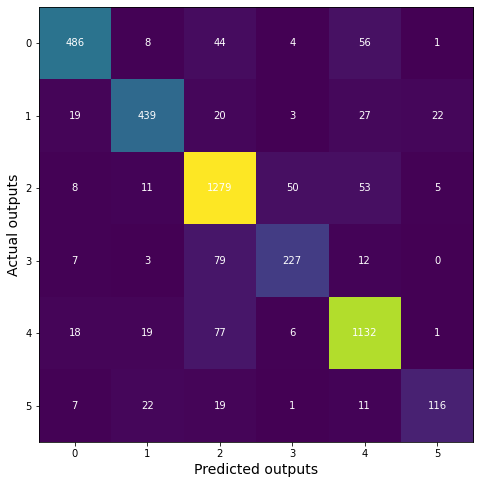

In [47]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=14, color='black')
ax.set_ylabel('Actual outputs', fontsize=14, color='black')
ax.xaxis.set(ticks=range(6))
ax.yaxis.set(ticks=range(6))
ax.set_ylim(5.5, -0.5)
for i in range(6):
    for j in range(6):
        ax.text(j, i, conf[i, j], ha='center', va='center', color='white')
plt.show()

In [48]:
from sklearn.model_selection import cross_val_score
from time import perf_counter
from sklearn.model_selection import KFold
ACC=[]
for i in range(1):
    kf = KFold(n_splits=3,random_state=int(perf_counter ()*100),shuffle=True)
    acc = cross_val_score(estimator=clr, X=X, y=Y, cv=kf)
    ACC.append(acc)
ACC=np.array(ACC)

print(acc)
print('average score: {}'.format(acc.mean()))
print('standard deviation score: {}'.format(acc.std()))
#print(ACC)
print('average score: {}'.format(ACC.mean()))
print('standard deviation score: {}'.format(ACC.std()))



[0.8583613  0.85346756 0.85248881]
average score: 0.854772557792692
standard deviation score: 0.0025688877292171235
average score: 0.854772557792692
standard deviation score: 0.0025688877292171235


In [49]:
from time import perf_counter
from sklearn.model_selection import StratifiedKFold
#skf=StratifiedKFold(n_splits=5, random_state=int(perf_counter ()*100), shuffle=True)

ACC=[]
for i in range(1):
    skf = StratifiedKFold(n_splits=3, random_state=int(perf_counter ()*100), shuffle=True)
    acc = cross_val_score(estimator=clr, X=X, y=Y, cv=skf)
    ACC.append(acc)
ACC=np.array(ACC)
print('average score: {}'.format(ACC.mean()))
print('standard deviation score: {}'.format(ACC.std()))

KeyboardInterrupt: 

In [ ]:
from time import perf_counter
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


ACC=[]
for i in range(1):
    Ssp = ShuffleSplit(n_splits=3, test_size=0.35,random_state=int(perf_counter ()*100))
    acc = cross_val_score(estimator=clr, X=X, y=Y, cv=Ssp)
    ACC.append(acc)
ACC=np.array(ACC)
print('average score: {}'.format(ACC.mean()))
print('standard deviation score: {}'.format(ACC.std()))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

## cross-validation
# cv = KFold(n_splits=3, shuffle=True) # shuffle and divide in 3 equal parts
#cv = StratifiedKFold(n_splits=3, shuffle=True) # KFold with 'stratify' option
# # test_size is available in ShuffleSplit
from sklearn.metrics import f1_score, make_scorer, accuracy_score, precision_score, recall_score

scoring0 = {'accuracy' : make_scorer(accuracy_score), 
       'precision' : make_scorer(precision_score, average = 'micro'),
       'recall' : make_scorer(recall_score, average = 'micro'), 
       'f1_score' : make_scorer(f1_score, average = 'micro')}
Ssp = ShuffleSplit(n_splits=3, test_size=0.2,random_state=42)
scores = cross_validate(estimator=clr, X=X, y=Y, cv=Ssp,scoring=scoring0)
print("Cross validation scores:", scores)
#print("Mean score:", np.mean(scores))

In [ ]:
#pipe1 = Pipeline([('vect', CountVectorizer()), ('sgd', SGDClassifier()),])
#pipe2 = Pipeline([('vect', CountVectorizer()),('svm', SVC()),])
#pipe3 = Pipeline([('vect', CountVectorizer()), ('logreg', LogisticRegression()),])
#pipe4 = Pipeline([('vect', CountVectorizer()),('KNN', KNeighborsClassifier(n_neighbors=4)),]) 
#pipe5 = Pipeline([('vect', CountVectorizer()),('DTC', DecisionTreeClassifier(max_depth=4)),])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

pipe1= Pipeline([('vect', CountVectorizer(analyzer=clean_title)), ('Rfor', RandomForestClassifier(n_estimators=1000, class_weight='balanced'))])
pipe2= Pipeline([('vect', CountVectorizer(analyzer=clean_title)), ('logregub', LogisticRegression(class_weight='balanced',max_iter=1000))])
pipe3= Pipeline([('vect', CountVectorizer(analyzer=clean_title)), ('svm', SVC(kernel='linear',class_weight='balanced',probability=True))])   
pipe4= Pipeline([('vect', CountVectorizer(analyzer=clean_title)), ('Dtc', DecisionTreeClassifier (max_depth=4,class_weight='balanced'))])                   
               
                

In [ ]:
#def run_pipes(pipes) :

    #df = pd.DataFrame(columns=['model', 'fitting_time', 'accuracy',  'precision', 'recall','f1_score'])

    #for pipe in pipes : 
       # start = time()
       # pipe.fit(X_train, y_train)
        #fit_time = time() - start
        #y_pred =pipe.predict(X_test)

        #acc = metrics.accuracy_score(y_test, y_pred) 
       # pre = metrics.precision_score(y_test,y_pred,average ='macro', zero_division=0)
       # rec = metrics.recall_score(y_test,y_pred, average ='macro', zero_division=0)
       # f1_score(y_true, y_pred, average='macro')

        #df = df.append({'model':pipe.steps[1][0], 'fitting_time':fit_time, 
                       # 'accuracy': acc, 'precision':pre, 'recall': rec},ignore_index=True)
   # return df
#============
#X = corpus1
#y = targets1
#X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

#df1 = run_pipes(pipes= [pipe1, pipe3, pipe4,pipe5])
#df1

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedShuffleSplit
#data_em_02_c01["Text"]
X1=copy.copy(data_em_02_c01["Text"])
Y1=copy.copy(data_em_02_c01['category'])

def run_pipes(pipes, splits=10, test_size=0.2, seed=42):  
    res = defaultdict(list)
    spliter = StratifiedShuffleSplit(n_splits=splits, test_size=test_size, random_state=seed)
    for idx_train, idx_test in spliter.split(X1):
        for pipe in pipes:
            # name of the model
            name = "-".join([x[0] for x in pipe.steps])
            
            # extract datasets
            X_train = X1[idx_train]
            X_test = X1[idx_test]
            y_train = Y1[idx_train]
            y_test = Y1[idx_test]
            
            # Learn
            start = time()
            pipe.fit(X_train, y_train)
            fit_time = time() - start
            
            # predict and save results
            y_pred = pipe.predict(X_test)
            res[name].append([
                fit_time,
                f1_score(y_test, y_pred, average='macro'),
                accuracy_score(y_test, y_pred),
                precision_score(y_test,y_pred,average ='macro', zero_division=0),
                recall_score(y_test,y_pred, average ='macro', zero_division=0)
            ])
    return res

def print_table(res):
    # Compute mean and std
    final = {}
    for model in res:
        arr = np.array(res[model])
        final[model] = {
            "time" : arr[:, 0].mean().round(2),
            "f1_score": [arr[:,1].mean().round(3), arr[:,1].std().round(5)],
            "accauracy_score": [arr[:,2].mean().round(3), arr[:,2].std().round(5)],
            "precision_score": [arr[:,3].mean().round(3), arr[:,3].std().round(5)],
            "recall_score": [arr[:,4].mean().round(3), arr[:,4].std().round(35)],
        }

    df = pd.DataFrame.from_dict(final, orient="index").round(5)
    return df

In [ ]:
# run base pipes
res = run_pipes([pipe1, pipe2,pipe3,pipe4], splits=3)

In [ ]:
print_table(res)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import SMOTE


weights={0:3,1:3,2:1.,3:5.0,4:1.0,5:6}
pipe0= Pipeline([('vect', CountVectorizer(analyzer=clean_title)), ('logregub', LogisticRegression(class_weight=weights,max_iter=1000)),])

X1=copy.copy(data_em_02_c01["Text"])

Y1=copy.copy(data_em_02_c01['category'])

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.20, random_state=42, stratify=Y1)
pipe0.fit(X1_train, Y1_train)
clr0=pipe0.score(X1_test, Y1_test)
print(clr0)


In [ ]:
from imblearn.over_sampling import SMOTE
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.20, random_state=42, stratify=Y1)
# word level tf-idf

count_vectorize2 = CountVectorizer(analyzer=clean_title)

count_vectorize2.fit(X1)
X1_train =  count_vectorize2.transform(X1_train)
X1_test =  count_vectorize2.transform(X1_test)

#Random Over Sampling
strategy0={0:3000, 1: 3000, 2:7030, 3:3000,4:6300,5:3000}

#ros = RandomUnderSampler(sampling_strategy=strategy)
ros=SMOTE(sampling_strategy=strategy0)
X1_train, Y1_train = ros.fit_sample(X1_train, Y1_train)


steps=[ ('logregub', LogisticRegression(max_iter=1000,solver='liblinear'))]
pipe01=Pipeline(steps=steps)
pipe01.fit(X1_train, Y1_train)
clr01=pipe01.score(X1_test, Y1_test)
print(clr01)

# VI) Conclusion et Perspectives

Les résultats de prédiction affiche un f1_score d'environ 0.9. Vu que les classes sont non équilibrés, il sera plus judicieux d'essayer des algorithmes tenanat compte de cettte particularité de notre base de donnée